In [4]:
import jax
import jax.numpy as jnp
import jax.random as jr

import equinox
from equinox.serialisation import tree_deserialise_leaves as load

import numpy as onp
from einops import rearrange
from PIL import Image
from pathlib import Path
from yuki.image.upscale import Waifu2x, RRDBNet

key = jr.PRNGKey(42)
wkey, rkey = jr.split(key)

waifu2x = Waifu2x(3, 16, key=wkey)
esrgan = RRDBNet(3, 64, key=rkey)

waifu2x = load("../weights/waifu2x.nox", waifu2x)
esrgan = load("../weights/esrgan4x-6B.nox", esrgan)

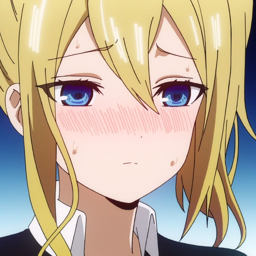

In [5]:
def image_to_tensor(image:Image) -> jnp.ndarray:
    tensor = rearrange(onp.array(image), 'h w c -> c h w') / 255.
    return tensor

def tensor_to_image(tensor:jnp.ndarray) -> Image:
    tensor = rearrange(tensor.clip(0,1), 'c h w -> h w c')
    image = Image.fromarray(onp.uint8(tensor * 255))
    return image

image = Image.open("hayasaka.png")
tensor = image_to_tensor(image)

image

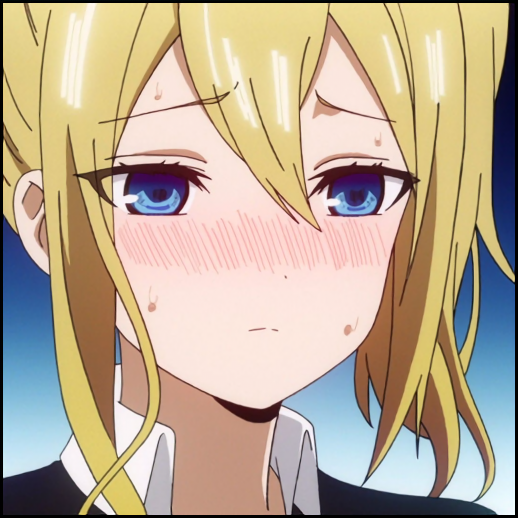

In [6]:
tensor_to_image(waifu2x(tensor)) # 2X scaling

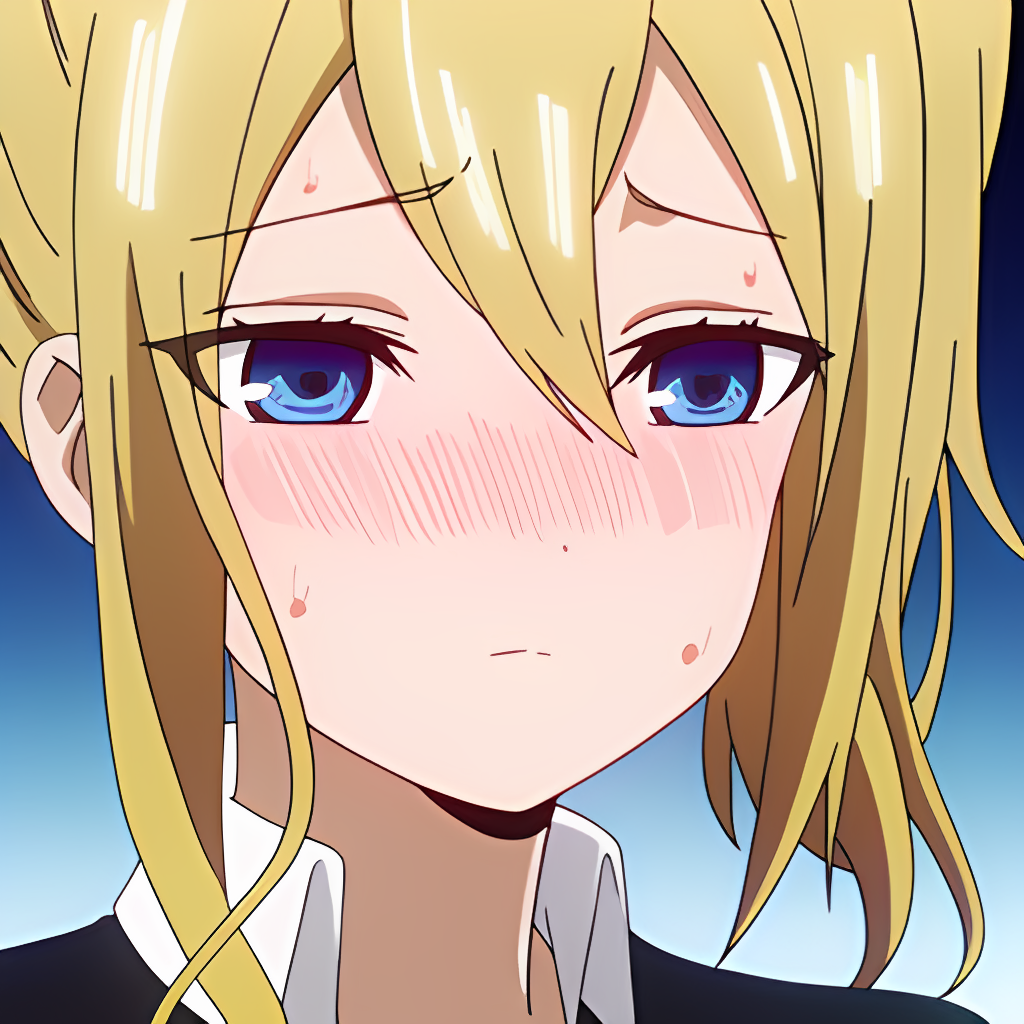

In [7]:
tensor_to_image(esrgan(tensor)) # 4X scaling